<a href="https://colab.research.google.com/github/marianomontes/infovis/blob/main/Pasos_Mariano_Montes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Pasos Caminados Mariano Montes


## Materia Visualización de la Información
Comisión: ECD.2023.B
Profesor: Diego Ariel Aizemberg

In [32]:
import duckdb as db
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [39]:
data = pd.read_csv('Pasos Mariano Montes.csv')
data.sample(10)

,type,sourceName,sourceVersion,productType,device,startDate,endDate,unit,value
1763,HKQuantityTypeIdentifierStepCount,iPhone de Mariano,17.1.1,"iPhone14,5","<<HKDevice: 0x30236e490>, name:iPhone, manufac...",22/11/2023 21:53,22/11/2023 22:03,count,199
2129,HKQuantityTypeIdentifierStepCount,iPhone de Mariano,17.1.2,"iPhone14,5","<<HKDevice: 0x302343f70>, name:iPhone, manufac...",07/12/2023 15:12,07/12/2023 15:19,count,31
3318,HKQuantityTypeIdentifierStepCount,iPhone de Mariano,17.1.2,"iPhone14,5","<<HKDevice: 0x30236d860>, name:iPhone, manufac...",17/01/2024 21:11,17/01/2024 21:21,count,715
249,HKQuantityTypeIdentifierStepCount,iPhone de Mariano,16.6,"iPhone14,5","<<HKDevice: 0x30236e940>, name:iPhone, manufac...",12/09/2023 00:55,12/09/2023 01:00,count,17
5162,HKQuantityTypeIdentifierStepCount,iPhone de Mariano,17.3.1,"iPhone14,5","<<HKDevice: 0x302342c10>, name:iPhone, manufac...",01/04/2024 13:22,01/04/2024 13:22,count,36
5509,HKQuantityTypeIdentifierStepCount,iPhone de Mariano,17.4.1,"iPhone14,5","<<HKDevice: 0x302343020>, name:iPhone, manufac...",16/04/2024 20:16,16/04/2024 20:20,count,249
3031,HKQuantityTypeIdentifierStepCount,iPhone de Mariano,17.1.2,"iPhone14,5","<<HKDevice: 0x3023438e0>, name:iPhone, manufac...",09/01/2024 16:32,09/01/2024 16:42,count,545
4842,HKQuantityTypeIdentifierStepCount,iPhone de Mariano,17.3.1,"iPhone14,5","<<HKDevice: 0x302342c10>, name:iPhone, manufac...",23/03/2024 18:35,23/03/2024 18:41,count,384
2383,HKQuantityTypeIdentifierStepCount,iPhone de Mariano,17.1.2,"iPhone14,5","<<HKDevice: 0x302343f70>, name:iPhone, manufac...",18/12/2023 01:56,18/12/2023 02:01,count,39
3539,HKQuantityTypeIdentifierStepCount,iPhone de Mariano,17.1.2,"iPhone14,5","<<HKDevice: 0x30236d860>, name:iPhone, manufac...",23/01/2024 13:45,23/01/2024 13:45,count,11


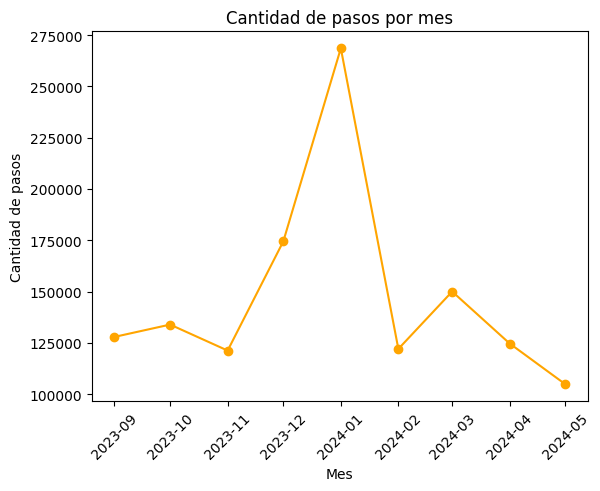

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir las fechas a tipo datetime utilizando el formato adecuado
data['startDate'] = pd.to_datetime(data['startDate'], format='%d/%m/%Y %H:%M')

# Agrupar los datos por mes y sumar los valores de pasos
monthly_data = data.groupby(data['startDate'].dt.to_period('M'))['value'].sum()

# Crear el gráfico de líneas
plt.plot(monthly_data.index.to_timestamp(), monthly_data.values, marker='o', linestyle='-', color='orange')
plt.xlabel('Mes')
plt.ylabel('Cantidad de pasos')
plt.title('Cantidad de pasos por mes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()



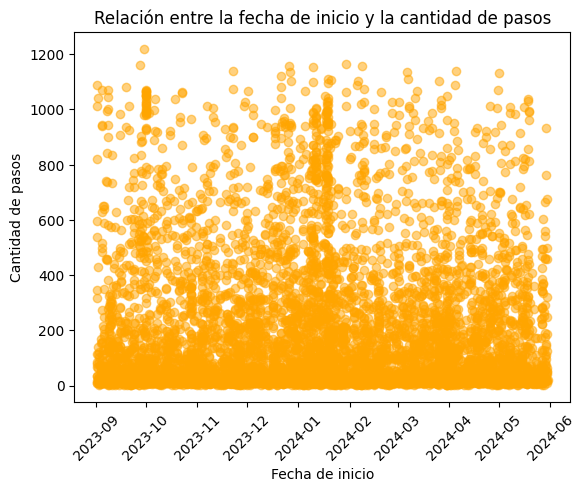

In [37]:
plt.scatter(data['startDate'], data['value'], alpha=0.5, color='orange')  # alpha ajusta la transparencia de los puntos
plt.xlabel('Fecha de inicio')
plt.ylabel('Cantidad de pasos')
plt.title('Relación entre la fecha de inicio y la cantidad de pasos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()


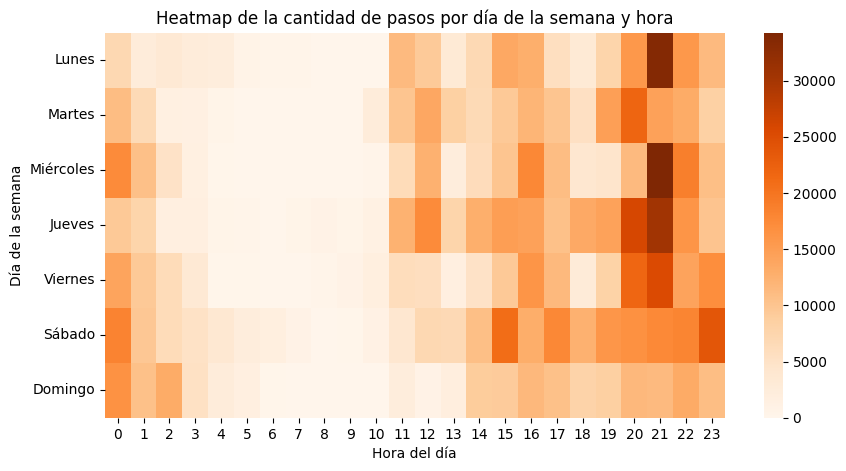

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes una base de datos llamada 'data' con los campos 'startDate', 'endDate' y 'value'

# Convertir las fechas a tipo datetime utilizando el formato adecuado (día/mes/año hora:minuto)
data['startDate'] = pd.to_datetime(data['startDate'], format='%d/%m/%Y %H:%M')
data['endDate'] = pd.to_datetime(data['endDate'], format='%d/%m/%Y %H:%M')

# Luego, crea una nueva columna 'day_of_week' que contenga el nombre del día de la semana en español
dias_semana = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
data['day_of_week'] = data['startDate'].dt.dayofweek.map(dias_semana)

# Crear una categoría ordenada para los días de la semana
ordered_days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=ordered_days, ordered=True)

# Ahora, agrupa los datos por día de la semana y por hora, y suma los valores de 'value' para obtener la cantidad total de pasos
heatmap_data = data.groupby([data['day_of_week'], data['startDate'].dt.hour])['value'].sum().unstack()

# Crear el heatmap con la paleta de colores 'Oranges' (naranja)
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='Oranges')
plt.title('Heatmap de la cantidad de pasos por día de la semana y hora')
plt.xlabel('Hora del día')
plt.ylabel('Día de la semana')
plt.show()

